import the libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from google.colab import drive


In [ ]:
credit_card_data=pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:
#first five rows of data set
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#checking missing values in eacch coloumn
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#distribution of legit and fraud transactions
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

the data is very unbalanced

1.   1-->fraudulent transaction
2.   0-->legit transaction



In [ ]:
#seprating fraud from legit and storing it in variables
legit=credit_card_data[credit_card_data.Class==0]
fraud=credit_card_data[credit_card_data.Class==1]


In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


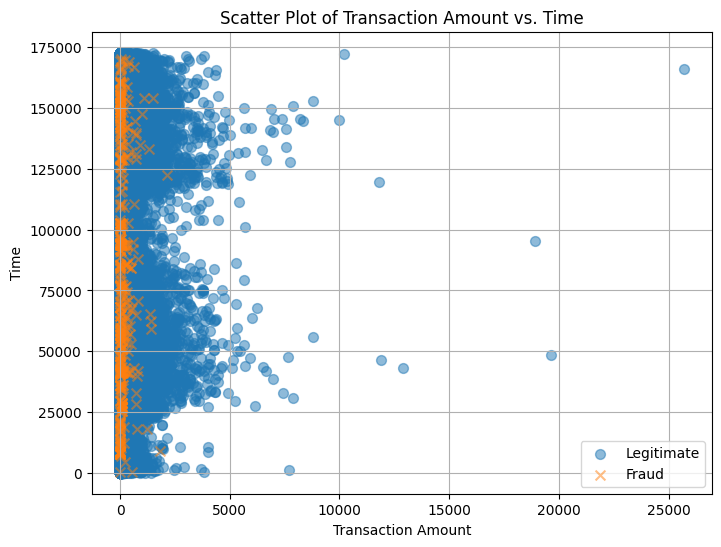

In [ ]:

# Create a scatter plot
plt.figure(figsize=(8, 6))

plt.scatter(legit['Amount'], legit['Time'], label='Legitimate', marker='o', s=50, alpha=0.5)
plt.scatter(fraud['Amount'], fraud['Time'], label='Fraud', marker='x', s=50, alpha=0.5)

# Customize the plot
plt.title('Scatter Plot of Transaction Amount vs. Time')
plt.xlabel('Transaction Amount')
plt.ylabel('Time')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
#statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
#compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
#under sampling
#building a sample data set containing similar distribution of the normal transaction and the fraudulent transaction

In [ ]:
legit_sample=legit.sample(n=492)

In [ ]:
#concatenating 2 datasets to form a balanced dataset for training the model
new_dataset=pd.concat([legit_sample,fraud],axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
47706,43318.0,-2.383729,0.276458,1.221318,0.248725,0.746180,-0.001746,0.417938,0.526554,0.053291,...,-0.262271,-0.023028,0.358649,-0.348755,0.940679,-0.360804,0.185960,-0.248735,21.49,0
179905,124283.0,-0.548029,-1.774504,-0.456563,-1.788957,1.412017,-0.706047,0.504711,-0.739054,0.099929,...,0.518605,2.160565,-0.236858,-0.903763,-0.956336,-0.103596,-0.044392,-0.087327,150.00,0
170326,120126.0,1.816439,-1.164394,-0.953129,-0.248369,-0.671990,-0.240302,-0.329708,-0.174642,-0.382861,...,-0.759086,-1.977249,0.474123,0.549305,-0.760214,-0.103552,-0.048707,-0.005293,174.41,0
55241,46845.0,-0.600993,-0.177266,-0.294440,-2.694313,1.636386,3.644937,0.051889,0.742153,-0.938819,...,0.034031,0.023043,-0.056276,1.021888,-0.031673,-0.469173,-0.057373,0.099013,102.00,0
5894,6440.0,-0.587266,1.535434,-1.971609,0.040743,2.317795,3.055384,-0.382015,1.469062,0.363896,...,0.030640,0.093722,0.122907,0.942910,-0.536129,-0.445805,0.037501,0.072503,4.51,0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93369.085366,-0.122228,-0.144951,0.042737,0.153354,0.043095,0.000458,-0.030008,-0.055705,-0.015148,...,0.069108,-0.038492,-0.006935,0.000272,-0.028078,-0.019510,-0.012057,0.011811,-0.011369,104.207419
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


splitting the dataset into two variables
features and targets

In [ ]:
X=new_dataset.drop(columns='Class',axis=1)
Y=new_dataset['Class']
#we will not have the class coloumn in x

In [ ]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
47706    43318.0 -2.383729  0.276458  1.221318  0.248725  0.746180 -0.001746   
179905  124283.0 -0.548029 -1.774504 -0.456563 -1.788957  1.412017 -0.706047   
170326  120126.0  1.816439 -1.164394 -0.953129 -0.248369 -0.671990 -0.240302   
55241    46845.0 -0.600993 -0.177266 -0.294440 -2.694313  1.636386  3.644937   
5894      6440.0 -0.587266  1.535434 -1.971609  0.040743  2.317795  3.055384   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(Y)

47706     0
179905    0
170326    0
55241     0
5894      0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [ ]:
#split the data into training data and testing data
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)



Model training using logistic regression because it is a binary classification problem

In [ ]:
model = LogisticRegression(max_iter = 1000)

In [ ]:
#training the model with training data
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

model evaluation

In [ ]:
#accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)


In [ ]:
print("the accuracy on training data by the model is :",training_data_accuracy)

the accuracy on training data by the model is : 0.9428208386277002


In [ ]:
X_test_predict = model.predict(X_test)
test_accuracy=accuracy_score(X_test_predict,Y_test)

In [ ]:
print("the accuracy on test data by the model is :",test_accuracy)

the accuracy on test data by the model is : 0.934010152284264


In [ ]:
Y_test_predicted=model.predict(X_test)
Y_test_predicted

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0])

In [ ]:
model.classes_

array([0, 1])

In [ ]:
cm=confusion_matrix(Y_test,Y_test_predicted,labels=model.classes_)
print(cm)

[[95  4]
 [ 8 90]]


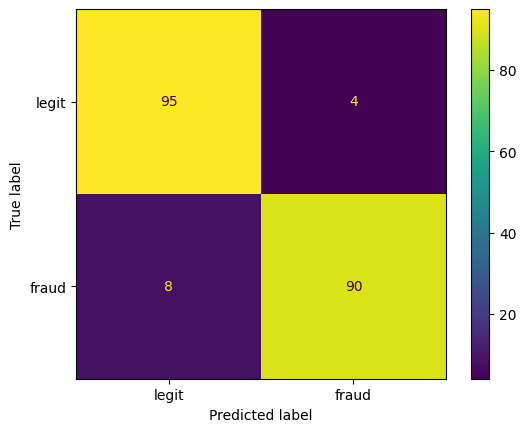

In [ ]:
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['legit','fraud'])
cm_display.plot()

In [ ]:
#using random forest classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2)

In [ ]:
#fitting data in model
rf_classifier.fit(X_train, Y_train)


RandomForestClassifier(random_state=2)

In [ ]:
#making a prediction in random forest
y_pred = rf_classifier.predict(X_test)


In [ ]:
testing_data_accuracy = accuracy_score(y_pred,Y_test)


In [ ]:
print("the accuracy on testing data by the model is :",testing_data_accuracy)


the accuracy on testing data by the model is : 0.9238578680203046


In [ ]:
y_pred = rf_classifier.predict(X_train)
training_data_accuracy = accuracy_score(y_pred,Y_train)
print("the accuracy on training data by the model is :",training_data_accuracy)


the accuracy on training data by the model is : 1.0


In [ ]:
Y_test_predicted=rf_classifier.predict(X_test)
Y_test_predicted

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0])

In [ ]:
cm=confusion_matrix(Y_test,Y_test_predicted,labels=rf_classifier.classes_)
print(cm)

[[95  4]
 [13 85]]


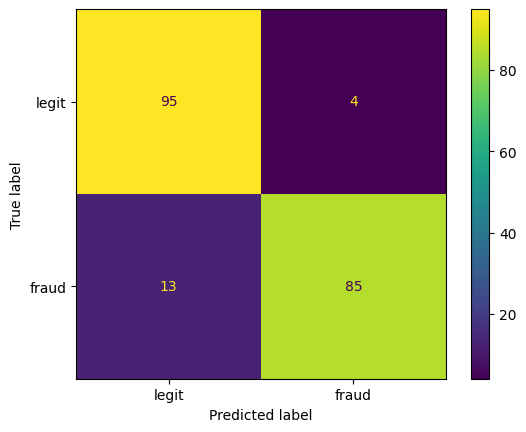

In [ ]:
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['legit','fraud'])
cm_display.plot()

In [ ]:
# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)
y_pred_train=dt_classifier.predict(X_train)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
accuracy1= accuracy_score(Y_train,y_pred_train)
print('the accuracy on training data by the model is: ',accuracy1)
print('the accuracy on testing data by the model is: ',accuracy)


the accuracy on training data by the model is:  1.0
the accuracy on testing data by the model is:  0.9137055837563451


In [ ]:
Y_test_predicted=dt_classifier.predict(X_test)
Y_test_predicted

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0])

In [ ]:
cm=confusion_matrix(Y_test,Y_test_predicted,labels=dt_classifier.classes_)
print(cm)

[[88 11]
 [14 84]]


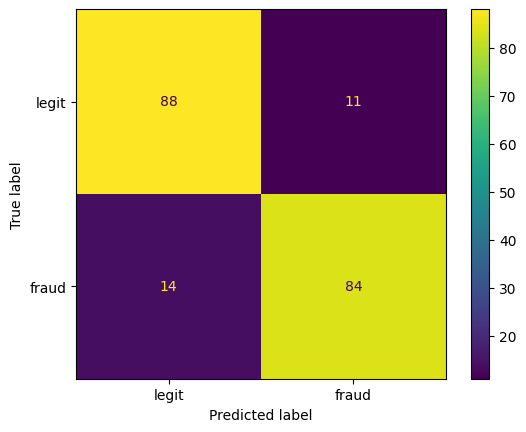

In [ ]:
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['legit','fraud'])
cm_display.plot()

In [ ]:
# Create a Linear Regression model
lin_reg = LinearRegression()

# Fit the model to the training data
lin_reg.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = lin_reg.predict(X_test)
y_pred_train= lin_reg.predict(X_train)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
mse_train=mean_squared_error(Y_train,y_pred_train)
r2_train = r2_score(Y_train,y_pred_train)

print('the mean squared error on training data is: ',mse_train)
print('the r squared on training data is: ',r2_train)
print('the mean squared error on testing data is: ',mse)
print("the r squared on testing data is: ",r2)


the mean squared error on training data is:  0.08326319684068531
the r squared on training data is:  0.6669466749072059
the mean squared error on testing data is:  0.09945428295329166
the r squared on testing data is:  0.602172617281561


In [ ]:
#k is the number of neighbors
k = 4
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, Y_train)

# Make Predictions
y_pred = knn.predict(X_test)
y_pred_train=knn.predict(X_train)

# Evaluate the Model
accuracy = accuracy_score(Y_test, y_pred)
accuracy2 = accuracy_score(Y_train,y_pred_train)

print("the accuracy on training data is: ",accuracy2)
print("the accuracy on testing data is: ",accuracy)

the accuracy on training data is:  0.761118170266836
the accuracy on testing data is:  0.6548223350253807


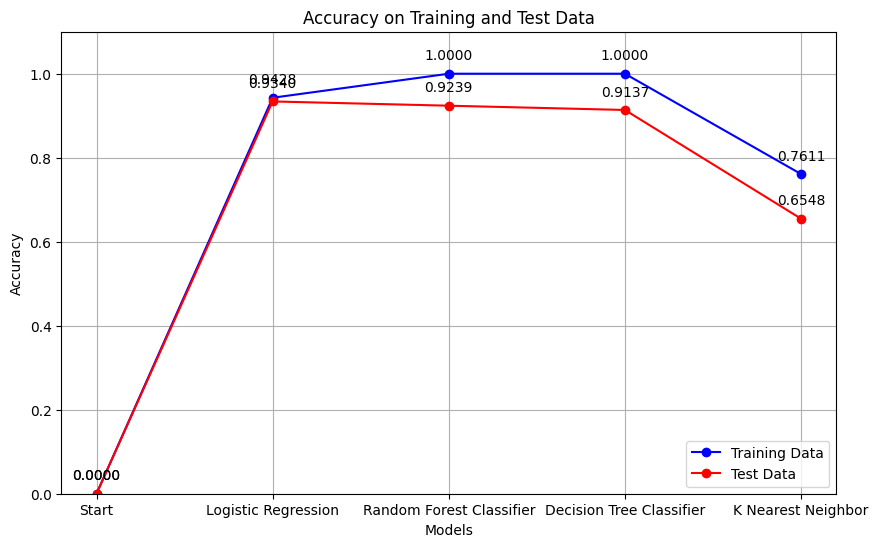

In [10]:
#LINE GRAPHS

training_accuracy_values = [0, 0.9428208386277002, 1.0, 1.0, 0.761118170266836]
test_accuracy_values = [0, 0.934010152284264, 0.9238578680203046, 0.9137055837563451, 0.6548223350253807]

# Extend the labels array to match the number of data points
labels = ['Start', 'Logistic Regression', 'Random Forest Classifier', 'Decision Tree Classifier', 'K Nearest Neighbor']

labels_test = ['Start', 'Logistic Regression', 'Random Forest Classifier', 'Decision Tree Classifier', 'K Nearest Neighbor']

plt.figure(figsize=(10, 6))

plt.plot(labels, training_accuracy_values, marker='o', linestyle='-', color='b', label='Training Data')
plt.plot(labels_test, test_accuracy_values, marker='o', linestyle='-', color='r', label='Test Data')

plt.title('Accuracy on Training and Test Data')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(True)

for i, acc in enumerate(training_accuracy_values):
    plt.annotate(f'{acc:.4f}', (labels[i], acc), textcoords="offset points", xytext=(0, 10), ha='center')

for i, acc in enumerate(test_accuracy_values):
    plt.annotate(f'{acc:.4f}', (labels_test[i], acc), textcoords="offset points", xytext=(0, 10), ha='center')

plt.legend(loc='lower right')

plt.ylim(0, max(max(training_accuracy_values), max(test_accuracy_values)) + 0.1)

plt.show()


In [ ]:
Y_test_predicted=knn.predict(X_test)
Y_test_predicted

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [ ]:
cm=confusion_matrix(Y_test,Y_test_predicted,labels=knn.classes_)
print(cm)

[[77 22]
 [47 51]]


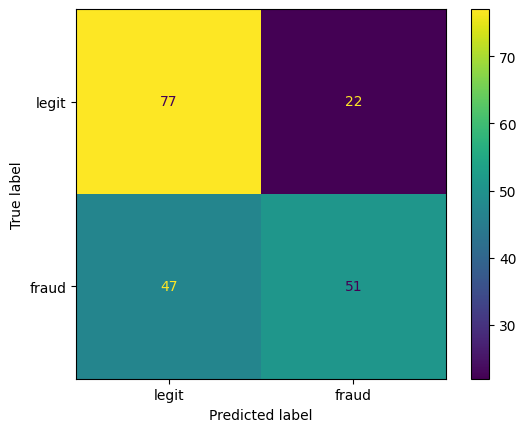

In [ ]:
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['legit','fraud'])
cm_display.plot()

In [ ]:
#dividing the data in 30-70 ratio
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

In [ ]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print("the accuracy on training data by the model is :",training_data_accuracy)
X_test_predict = model.predict(X_test)
test_accuracy=accuracy_score(X_test_predict,Y_test)
print("the accuracy on test data by the model is :",test_accuracy)

the accuracy on training data by the model is : 0.9491279069767442
the accuracy on test data by the model is : 0.9290540540540541


[[143   5]
 [ 21 127]]


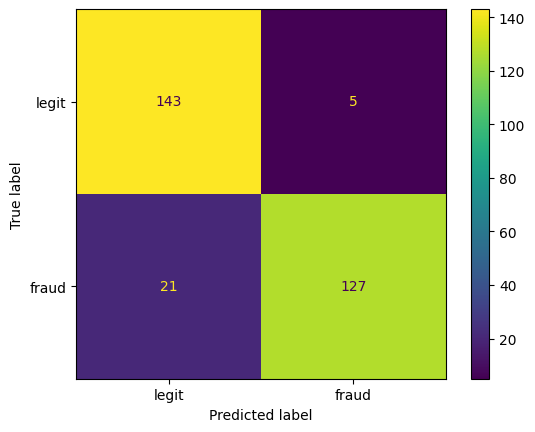

In [ ]:
Y_test_predicted=model.predict(X_test)
cm=confusion_matrix(Y_test,Y_test_predicted,labels=model.classes_)
print(cm)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['legit','fraud'])
cm_display.plot()



In [ ]:
#k is the number of neighbors
k = 4
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, Y_train)

# Make Predictions
y_pred = knn.predict(X_test)
y_pred_train=knn.predict(X_train)

# Evaluate the Model
accuracy = accuracy_score(Y_test, y_pred)
accuracy2 = accuracy_score(Y_train,y_pred_train)

print("the accuracy on training data is: ",accuracy2)
print("the accuracy on testing data is: ",accuracy)

the accuracy on training data is:  0.7761627906976745
the accuracy on testing data is:  0.6317567567567568


[[120  28]
 [ 83  65]]


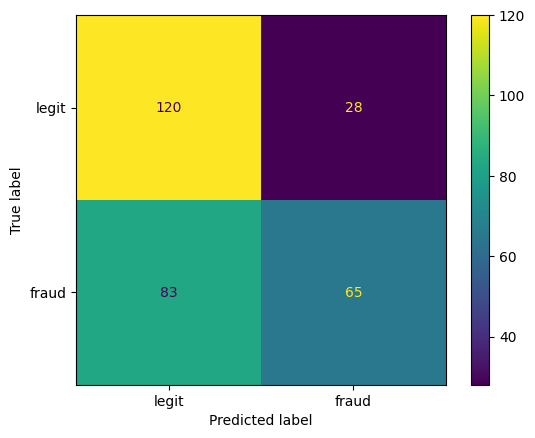

In [ ]:
Y_test_predicted=knn.predict(X_test)
cm=confusion_matrix(Y_test,Y_test_predicted,labels=knn.classes_)
print(cm)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['legit','fraud'])
cm_display.plot()


In [ ]:
# Create a Linear Regression model
lin_reg = LinearRegression()

# Fit the model to the training data
lin_reg.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = lin_reg.predict(X_test)
y_pred_train= lin_reg.predict(X_train)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
mse_train=mean_squared_error(Y_train,y_pred_train)
r2_train = r2_score(Y_train,y_pred_train)

print('the mean squared error on training data is: ',mse_train)
print('the r squared on training data is: ',r2_train)
print('the mean squared error on testing data is: ',mse)
print("the r squared on testing data is: ",r2)


the mean squared error on training data is:  0.08239426983919733
the r squared on training data is:  0.6704229206432106
the mean squared error on testing data is:  0.11775853871636052
the r squared on testing data is:  0.5289658451345579


In [ ]:
# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)
y_pred_train=dt_classifier.predict(X_train)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
accuracy1= accuracy_score(Y_train,y_pred_train)
print('the accuracy on training data by the model is: ',accuracy1)
print('the accuracy on testing data by the model is: ',accuracy)


the accuracy on training data by the model is:  1.0
the accuracy on testing data by the model is:  0.8783783783783784


[[135  13]
 [ 21 127]]


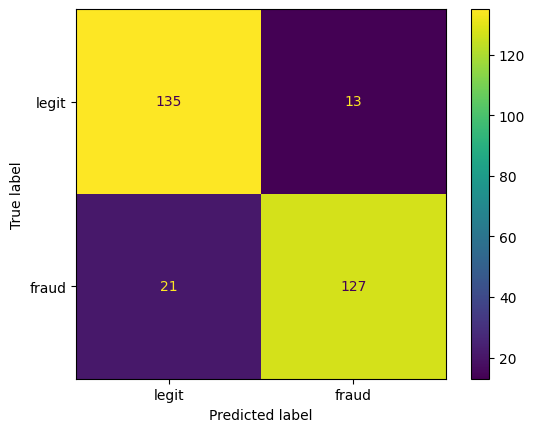

In [ ]:
Y_test_predicted=dt_classifier.predict(X_test)
cm=confusion_matrix(Y_test,Y_test_predicted,labels=dt_classifier.classes_)
print(cm)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['legit','fraud'])
cm_display.plot()


In [ ]:
#using random forest classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2)
#fitting data in model
rf_classifier.fit(X_train, Y_train)
#making a prediction in random forest
y_pred = rf_classifier.predict(X_test)
testing_data_accuracy = accuracy_score(y_pred,Y_test)
print("the accuracy on testing data by the model is :",testing_data_accuracy)
y_pred = rf_classifier.predict(X_train)
training_data_accuracy = accuracy_score(y_pred,Y_train)
print("the accuracy on training data by the model is :",training_data_accuracy)

the accuracy on testing data by the model is : 0.9256756756756757
the accuracy on training data by the model is : 1.0


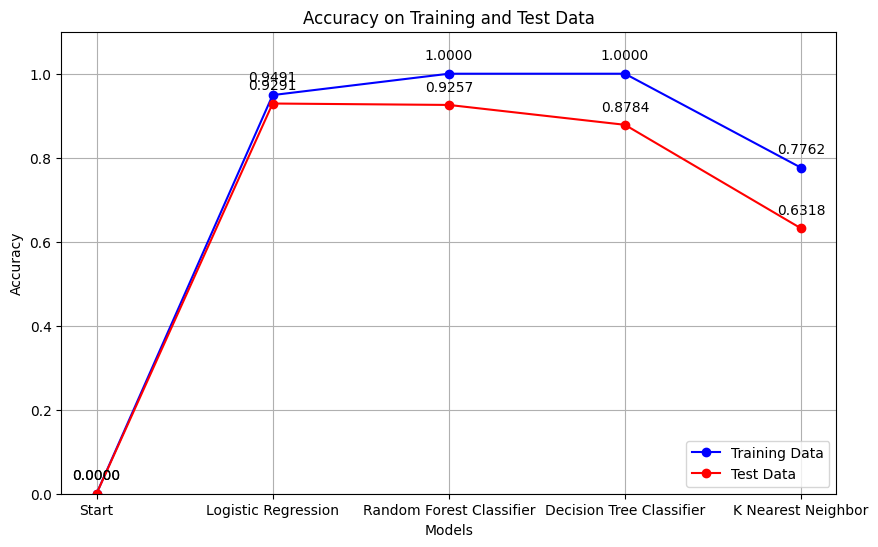

In [11]:
#LINE GRAPHS

training_accuracy_values = [0,0.9491279069767442,1.0 ,1.0,0.7761627906976745]
test_accuracy_values = [0,0.9290540540540541, 0.9256756756756757,0.8783783783783784,0.6317567567567568]

# Extend the labels array to match the number of data points
labels = ['Start', 'Logistic Regression', 'Random Forest Classifier', 'Decision Tree Classifier', 'K Nearest Neighbor']

labels_test = ['Start', 'Logistic Regression', 'Random Forest Classifier', 'Decision Tree Classifier', 'K Nearest Neighbor']

plt.figure(figsize=(10, 6))

plt.plot(labels, training_accuracy_values, marker='o', linestyle='-', color='b', label='Training Data')
plt.plot(labels_test, test_accuracy_values, marker='o', linestyle='-', color='r', label='Test Data')

plt.title('Accuracy on Training and Test Data')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(True)

for i, acc in enumerate(training_accuracy_values):
    plt.annotate(f'{acc:.4f}', (labels[i], acc), textcoords="offset points", xytext=(0, 10), ha='center')

for i, acc in enumerate(test_accuracy_values):
    plt.annotate(f'{acc:.4f}', (labels_test[i], acc), textcoords="offset points", xytext=(0, 10), ha='center')

plt.legend(loc='lower right')

plt.ylim(0, max(max(training_accuracy_values), max(test_accuracy_values)) + 0.1)

plt.show()


[[144   4]
 [ 21 127]]


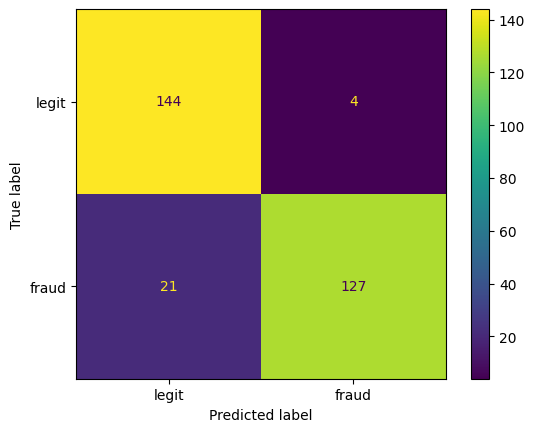

In [ ]:
Y_test_predicted=rf_classifier.predict(X_test)
cm=confusion_matrix(Y_test,Y_test_predicted,labels=rf_classifier.classes_)
print(cm)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['legit','fraud'])
cm_display.plot()

NOW FOR THE UNBALANCED DATA SET
CHECKING THE ACCURACY OF OUR 5 MODELS

In [ ]:
#NEW X AND Y
X=credit_card_data.drop(columns='Class',axis=1)
Y=credit_card_data['Class']


In [ ]:
print(X)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [ ]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64


In [ ]:
#split the data into training data and testing data
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape)

(284807, 30)


In [ ]:
model2=LogisticRegression(max_iter=1000);
#training the model with training data
model2.fit(X_train, Y_train)
#accuracy score on training data
X_train_prediction = model2.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print("the accuracy on training data by the model is :",training_data_accuracy)
X_test_predict = model2.predict(X_test)
test_accuracy=accuracy_score(X_test_predict,Y_test)
print("the accuracy on testing data by model is :",test_accuracy)

the accuracy on training data by the model is : 0.9991046544800193
the accuracy on testing data by model is : 0.9992977774656788


[[56856     8]
 [   32    66]]


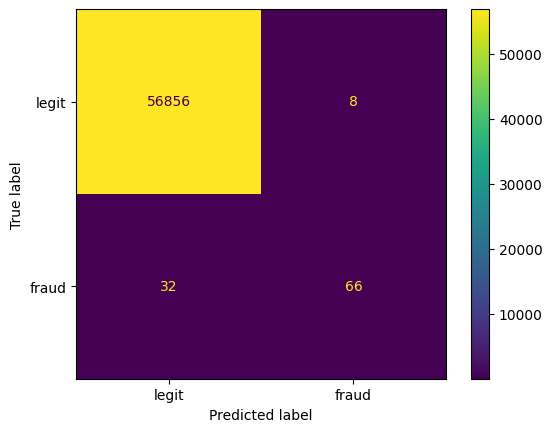

In [ ]:
Y_test_predicted=model2.predict(X_test)
cm=confusion_matrix(Y_test,Y_test_predicted,labels=model2.classes_)
print(cm)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['legit','fraud'])
cm_display.plot()

In [ ]:
#using random forest classifier model
rf_classifier2 = RandomForestClassifier(n_estimators=100, random_state=2)
#fitting data in model
rf_classifier2.fit(X_train, Y_train)
#making a prediction in random forest
y_pred = rf_classifier2.predict(X_test)
testing_data_accuracy = accuracy_score(y_pred,Y_test)
print("the accuracy on testing data by the model is :",testing_data_accuracy)
y_pred2 = rf_classifier2.predict(X_train)
training_data_accuracy2 = accuracy_score(y_pred2,Y_train)
print("the accuracy on training data by the model is :",training_data_accuracy2)


the accuracy on testing data by the model is : 0.9995435553526912
the accuracy on training data by the model is : 1.0


[[56857     7]
 [   19    79]]


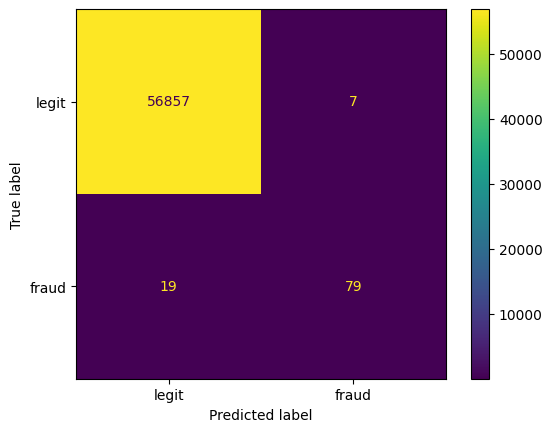

In [ ]:
Y_test_predicted=rf_classifier2.predict(X_test)
cm=confusion_matrix(Y_test,Y_test_predicted,labels=rf_classifier2.classes_)
print(cm)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['legit','fraud'])
cm_display.plot()

In [ ]:
# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)
y_pred_train=dt_classifier.predict(X_train)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
accuracy1= accuracy_score(Y_train,y_pred_train)
print('the accuracy on training data by the model is: ',accuracy1)
print('the accuracy on testing data by the model is: ',accuracy)


the accuracy on training data by the model is:  1.0
the accuracy on testing data by the model is:  0.9993153330290369


[[56846    18]
 [   18    80]]


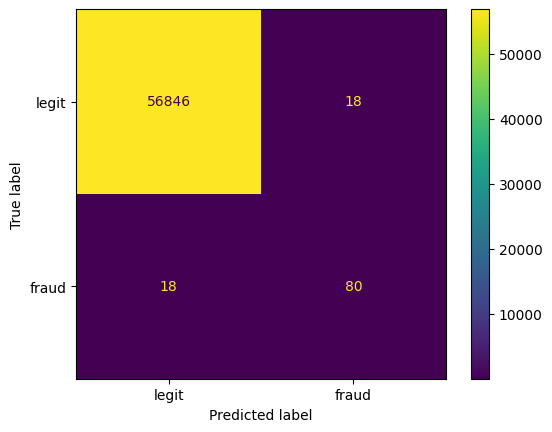

In [ ]:
Y_test_predicted=dt_classifier.predict(X_test)
cm=confusion_matrix(Y_test,Y_test_predicted,labels=dt_classifier.classes_)
print(cm)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['legit','fraud'])
cm_display.plot()

In [ ]:
# Create a Linear Regression model
lin_reg = LinearRegression()

# Fit the model to the training data
lin_reg.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = lin_reg.predict(X_test)
y_pred_train= lin_reg.predict(X_train)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
mse_train=mean_squared_error(Y_train,y_pred_train)
r2_train = r2_score(Y_train,y_pred_train)

print('the mean squared error on training data is: ',mse_train)
print('the r squared on training data is: ',r2_train)
print('the mean squared error on testing data is: ',mse)
print("the r squared on testing data is: ",r2)


the mean squared error on training data is:  0.0008362153655851243
the r squared on training data is:  0.5155900265347307
the mean squared error on testing data is:  0.0007803173027289288
the r squared on testing data is:  0.545662886889978


In [ ]:
#k is the number of neighbors
k = 4
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, Y_train)

# Make Predictions
y_pred = knn.predict(X_test)
y_pred_train=knn.predict(X_train)

# Evaluate the Model
accuracy = accuracy_score(Y_test, y_pred)
accuracy2 = accuracy_score(Y_train,y_pred_train)

print("the accuracy on training data is: ",accuracy2)
print("the accuracy on testing data is: ",accuracy)

the accuracy on training data is:  0.998411200596897
the accuracy on testing data is:  0.9984024437344194


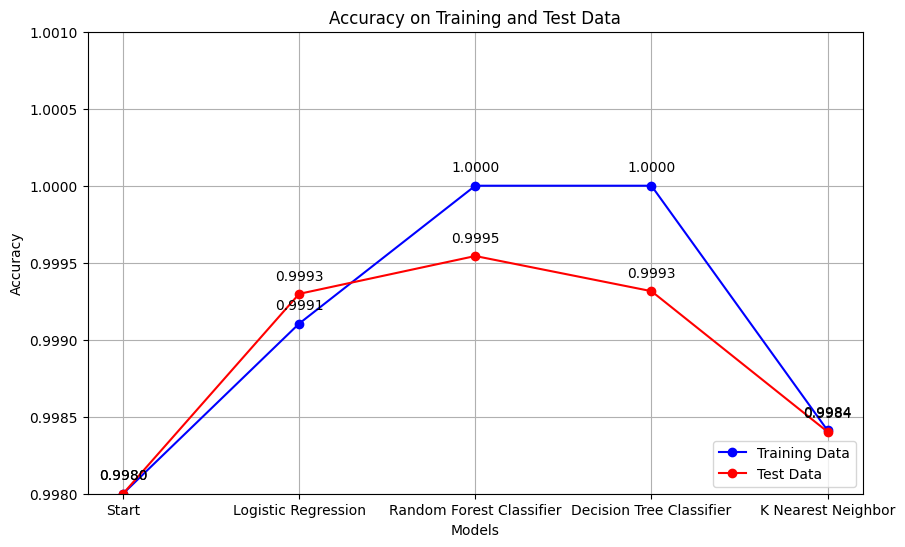

In [20]:
training_accuracy_values = [0.998, 0.9991046544800193, 1.0, 1.0, 0.998411200596897]
test_accuracy_values = [0.998, 0.9992977774656788, 0.9995435553526912, 0.9993153330290369, 0.9984024437344194]

# Extend the labels array to match the number of data points
labels = ['Start', 'Logistic Regression', 'Random Forest Classifier', 'Decision Tree Classifier', 'K Nearest Neighbor']

labels_test = ['Start', 'Logistic Regression', 'Random Forest Classifier', 'Decision Tree Classifier', 'K Nearest Neighbor']

plt.figure(figsize=(10, 6))

plt.plot(labels, training_accuracy_values, marker='o', linestyle='-', color='b', label='Training Data')
plt.plot(labels_test, test_accuracy_values, marker='o', linestyle='-', color='r', label='Test Data')

plt.title('Accuracy on Training and Test Data')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(True)

for i, acc in enumerate(training_accuracy_values):
    plt.annotate(f'{acc:.4f}', (labels[i], acc), textcoords="offset points", xytext=(0, 10), ha='center')

for i, acc in enumerate(test_accuracy_values):
    plt.annotate(f'{acc:.4f}', (labels_test[i], acc), textcoords="offset points", xytext=(0, 10), ha='center')

plt.legend(loc='lower right')

# Set the y-axis limits to focus on a narrower range
plt.ylim(0.998, 1.001)

plt.show()

[[56864     0]
 [   91     7]]


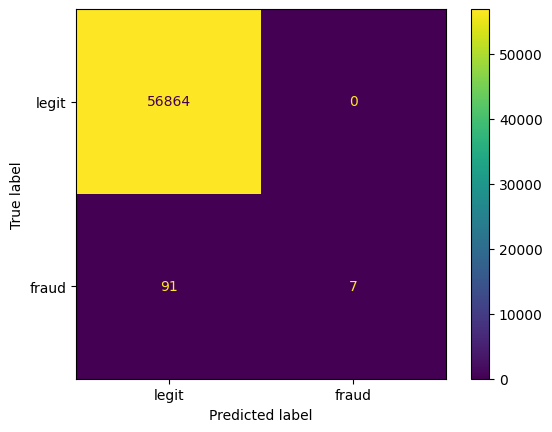

In [ ]:
Y_test_predicted=knn.predict(X_test)
cm=confusion_matrix(Y_test,Y_test_predicted,labels=knn.classes_)
print(cm)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['legit','fraud'])
cm_display.plot()

In [ ]:
#split the data into training data and testing data
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)
print(X.shape)

(284807, 30)


In [ ]:
model2=LogisticRegression(max_iter=1000);
#training the model with training data
model2.fit(X_train, Y_train)
#accuracy score on training data
X_train_prediction = model2.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print("the accuracy on training data by the model is :",training_data_accuracy)
X_test_predict = model2.predict(X_test)
test_accuracy=accuracy_score(X_test_predict,Y_test)
print("the accuracy on testing data by model is :",test_accuracy)

the accuracy on training data by the model is : 0.9990770650669127
the accuracy on testing data by model is : 0.9992743700478681


[[85284    11]
 [   51    97]]


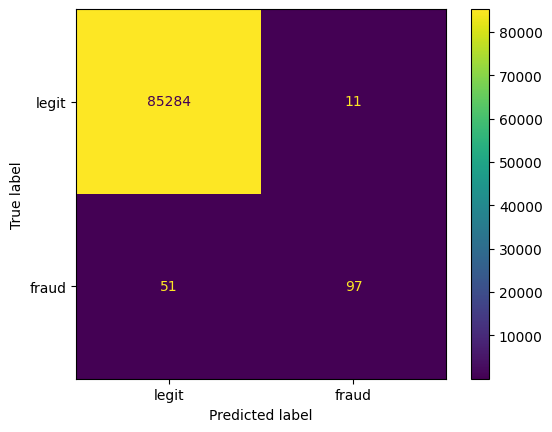

In [ ]:
Y_test_predicted=model2.predict(X_test)
cm=confusion_matrix(Y_test,Y_test_predicted,labels=model2.classes_)
print(cm)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['legit','fraud'])
cm_display.plot()

In [ ]:
#using random forest classifier model
rf_classifier3 = RandomForestClassifier(n_estimators=100, random_state=2)
#fitting data in model
rf_classifier3.fit(X_train, Y_train)
#making a prediction in random forest
y_pred = rf_classifier3.predict(X_test)
testing_data_accuracy = accuracy_score(y_pred,Y_test)
print("the accuracy on testing data by the model is :",testing_data_accuracy)
y_pred2 = rf_classifier3.predict(X_train)
training_data_accuracy2 = accuracy_score(y_pred2,Y_train)
print("the accuracy on training data by the model is :",training_data_accuracy2)


the accuracy on testing data by the model is : 0.9995435553526912
the accuracy on training data by the model is : 0.9999899680985535


[[85283    12]
 [   27   121]]


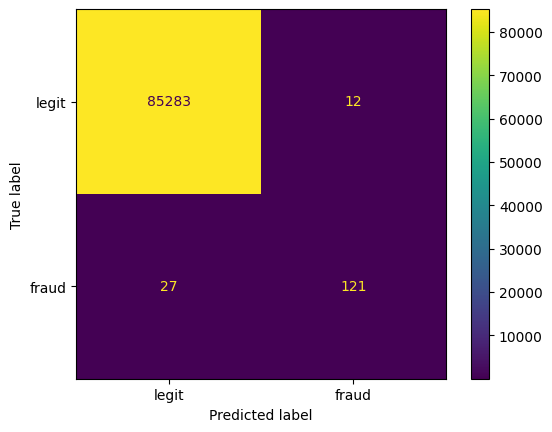

In [ ]:
Y_test_predicted=rf_classifier3.predict(X_test)
cm=confusion_matrix(Y_test,Y_test_predicted,labels=rf_classifier3.classes_)
print(cm)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['legit','fraud'])
cm_display.plot()

In [ ]:
# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)
y_pred_train=dt_classifier.predict(X_train)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
accuracy1= accuracy_score(Y_train,y_pred_train)
print('the accuracy on training data by the model is: ',accuracy1)
print('the accuracy on testing data by the model is: ',accuracy)


the accuracy on training data by the model is:  1.0
the accuracy on testing data by the model is:  0.9990871107053826


[[85248    47]
 [   31   117]]


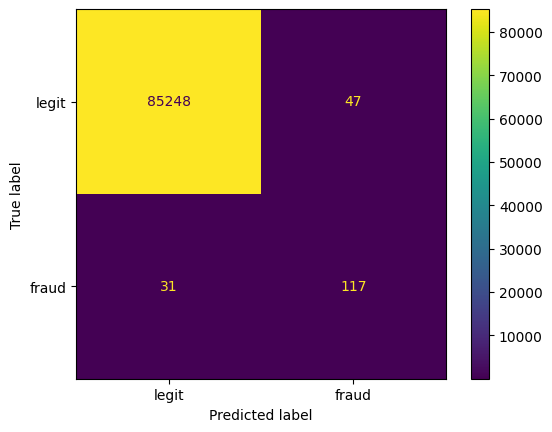

In [ ]:
Y_test_predicted=dt_classifier.predict(X_test)
cm=confusion_matrix(Y_test,Y_test_predicted,labels=dt_classifier.classes_)
print(cm)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['legit','fraud'])
cm_display.plot()

In [ ]:
# Create a Linear Regression model
lin_reg = LinearRegression()

# Fit the model to the training data
lin_reg.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = lin_reg.predict(X_test)
y_pred_train= lin_reg.predict(X_train)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
mse_train=mean_squared_error(Y_train,y_pred_train)
r2_train = r2_score(Y_train,y_pred_train)

print('the mean squared error on training data is: ',mse_train)
print('the r squared on training data is: ',r2_train)
print('the mean squared error on testing data is: ',mse)
print("the r squared on testing data is: ",r2)


the mean squared error on training data is:  0.000849363545697371
the r squared on training data is:  0.5069034883424972
the mean squared error on testing data is:  0.0007689662616886663
the r squared on testing data is:  0.5552919677234434


In [ ]:
#k is the number of neighbors
k = 4
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, Y_train)

# Make Predictions
y_pred = knn.predict(X_test)
y_pred_train=knn.predict(X_train)

# Evaluate the Model
accuracy = accuracy_score(Y_test, y_pred)
accuracy2 = accuracy_score(Y_train,y_pred_train)

print("the accuracy on training data is: ",accuracy2)
print("the accuracy on testing data is: ",accuracy)

the accuracy on training data is:  0.9984099436207139
the accuracy on testing data is:  0.9983146659176293


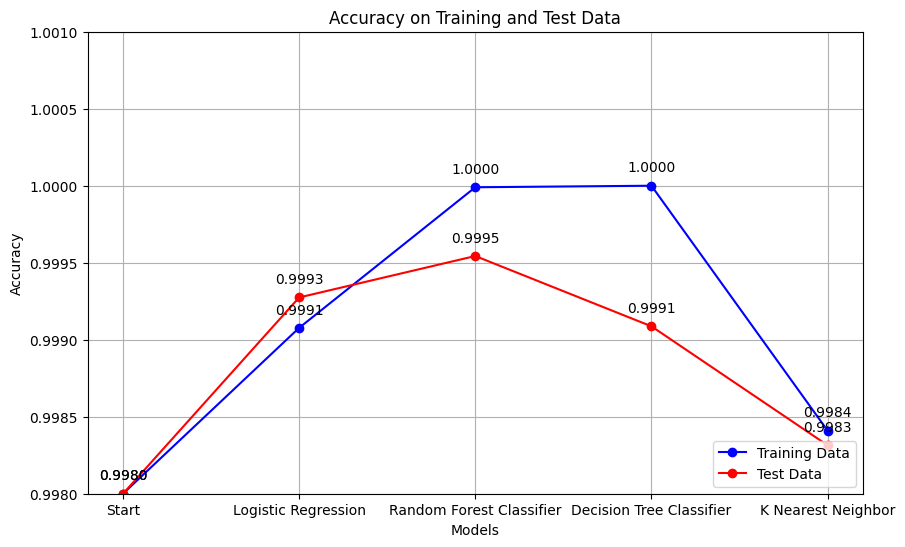

In [21]:
training_accuracy_values = [0.998, 0.9990770650669127,0.9999899680985535,1.0,0.9984099436207139]
test_accuracy_values = [0.998, 0.9992743700478681,0.9995435553526912,0.9990871107053826,0.9983146659176293]

# Extend the labels array to match the number of data points
labels = ['Start', 'Logistic Regression', 'Random Forest Classifier', 'Decision Tree Classifier', 'K Nearest Neighbor']

labels_test = ['Start', 'Logistic Regression', 'Random Forest Classifier', 'Decision Tree Classifier', 'K Nearest Neighbor']

plt.figure(figsize=(10, 6))

plt.plot(labels, training_accuracy_values, marker='o', linestyle='-', color='b', label='Training Data')
plt.plot(labels_test, test_accuracy_values, marker='o', linestyle='-', color='r', label='Test Data')

plt.title('Accuracy on Training and Test Data')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(True)

for i, acc in enumerate(training_accuracy_values):
    plt.annotate(f'{acc:.4f}', (labels[i], acc), textcoords="offset points", xytext=(0, 10), ha='center')

for i, acc in enumerate(test_accuracy_values):
    plt.annotate(f'{acc:.4f}', (labels_test[i], acc), textcoords="offset points", xytext=(0, 10), ha='center')

plt.legend(loc='lower right')

# Set the y-axis limits to focus on a narrower range
plt.ylim(0.998, 1.001)

plt.show()

[[85295     0]
 [  144     4]]


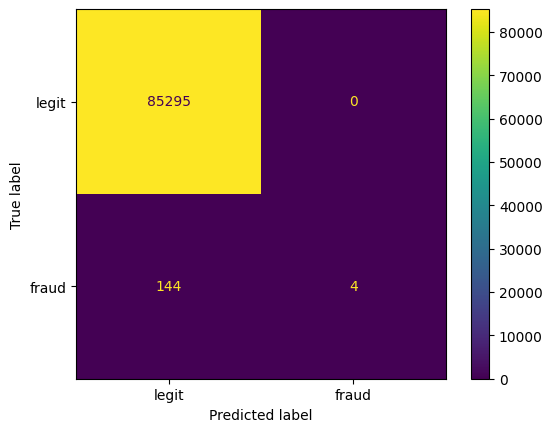

In [ ]:
Y_test_predicted=knn.predict(X_test)
cm=confusion_matrix(Y_test,Y_test_predicted,labels=knn.classes_)
print(cm)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['legit','fraud'])
cm_display.plot()